# Importing necessary packages

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Loading data set

In [28]:
df_fi = pd.read_csv(r"C:\Users\KEY6\bank\Bank_dcf.csv",sep = ',')

In [29]:
df_fi.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr8', 'Attr9',
       'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr30',
       'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38',
       'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45',
       'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr53',
       'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61',
       'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')

In [30]:
df_fi.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr12,Attr13,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.834118,0.031094,0.978440,0.017617,0.741344,0.875099,0.011637,0.013458,0.455331,0.353164,...,0.995314,0.756469,0.009528,0.088799,0.003655,0.013877,0.016297,0.012654,0.277543,0
1,0.830318,0.035191,0.978221,0.016544,0.741265,0.873559,0.011069,0.011092,0.455096,0.353159,...,0.995311,0.755852,0.009532,0.088799,0.002015,0.009195,0.017675,0.008230,0.277490,0
2,0.835345,0.024954,0.980172,0.025679,0.741636,0.873560,0.014547,0.015327,0.455589,0.353166,...,0.995322,0.756308,0.009482,0.088799,0.002602,0.010925,0.015979,0.015947,0.278090,0
3,0.834666,0.037560,0.977635,0.014879,0.741095,0.873560,0.010558,0.014099,0.455333,0.353170,...,0.995352,0.756829,0.009456,0.088912,0.002859,0.013745,0.016553,0.011177,0.277513,0
4,0.831538,0.028123,0.978924,0.019947,0.741467,0.874206,0.012643,0.013307,0.455200,0.353152,...,0.995307,0.755990,0.009555,0.088799,0.002985,0.012217,0.016158,0.013799,0.277552,0


In [31]:
df_fi.shape

(10083, 54)

# Assigning data features to X ,and Target class to y

In [32]:

x = df_fi.iloc[:,0:53]

x.shape

y = df_fi.iloc[:,53]

y.value_counts()


0    9685
1     398
Name: class, dtype: int64

# Train Test split

In [33]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40, random_state=42)


In [34]:
print("After spliting, counts of label '1' in TRAIN data: {} ".format(y_train[y_train==1].shape[0]))
print("After spliting, counts of label '0' in TRAIN data: {}".format(y_train[y_train==0].shape[0]))

After spliting, counts of label '1' in TRAIN data: 239 
After spliting, counts of label '0' in TRAIN data: 5810


In [35]:
print("After spliting, counts of label '1' in TEST data: {} ".format(y_test[y_test==1].shape[0]))
print("After spliting, counts of label '0' in TEST data: {}".format(y_test[y_test==0].shape[0]))

After spliting, counts of label '1' in TEST data: 159 
After spliting, counts of label '0' in TEST data: 3875


# logistic regression model classifying

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_lr = LogisticRegression()

In [38]:
model_lr.fit(x_train,y_train)

C:\Users\KEY6\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Confusion matrix and classification report

In [39]:
y_predicted=model_lr.predict(x_test)

print(classification_report(y_test, y_predicted))

cm=confusion_matrix(y_test, y_predicted)
print(cm)
print(accuracy_score(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3875
           1       0.00      0.00      0.00       159

    accuracy                           0.96      4034
   macro avg       0.48      0.50      0.49      4034
weighted avg       0.92      0.96      0.94      4034

[[3875    0]
 [ 159    0]]
0.9605850272682201


C:\Users\KEY6\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AUC ROC curve

In [40]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_lr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

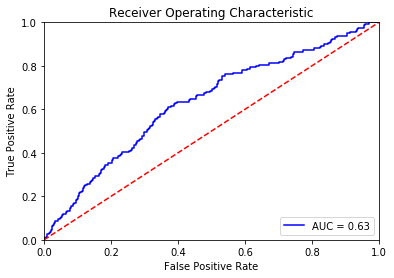

In [41]:

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [42]:
# auc value

In [43]:
print("AUC value",roc_auc)

AUC value 0.6306966930411848


In [44]:
gini = (2*roc_auc)-1

In [45]:
print("gini score = ",gini)

gini score =  0.2613933860823696


In [46]:
confi_lvl = model_lr.predict_proba(x)

In [47]:
confi_lvl = pd.DataFrame(confi_lvl)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429BA45240>,
      dtype=object)

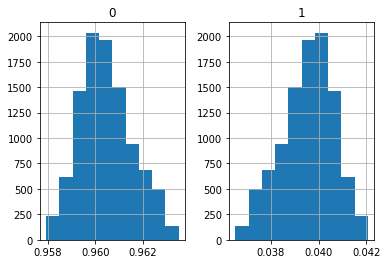

In [48]:
confi_lvl.hist()

In [49]:
feature_importance = abs(model_lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [50]:
feature_importance

array([ 46.10846316,  95.96109451,  33.56111455,  68.6661158 ,
        19.99404666,  24.56855463,  33.79412742,   6.72297005,
        14.17026414,   7.95263973,   4.0420077 ,  14.22010393,
         7.94358911,  17.94599992,  14.86326989,   9.27057764,
        14.21975239,  29.98454541,   1.59799463,  12.284919  ,
        10.91261806,   1.44630866,   4.04739043,  15.8941756 ,
         5.91793828,  10.08912006,   7.76645767,   4.25236693,
        26.22000356,  22.91086375,   9.53912628,  16.43096778,
        21.11766242,   3.59102441,   3.77112601,   3.5183518 ,
        30.53808467,   1.0699598 ,   9.37185498,  22.42800656,
        28.90663446, 100.        ,   4.71949372,  20.28381254,
        22.28037724,  20.19065113,   0.56459272,   1.78942788,
         2.95656303,   2.5067693 ,   5.14054636,  54.3307856 ,
         5.74918205])

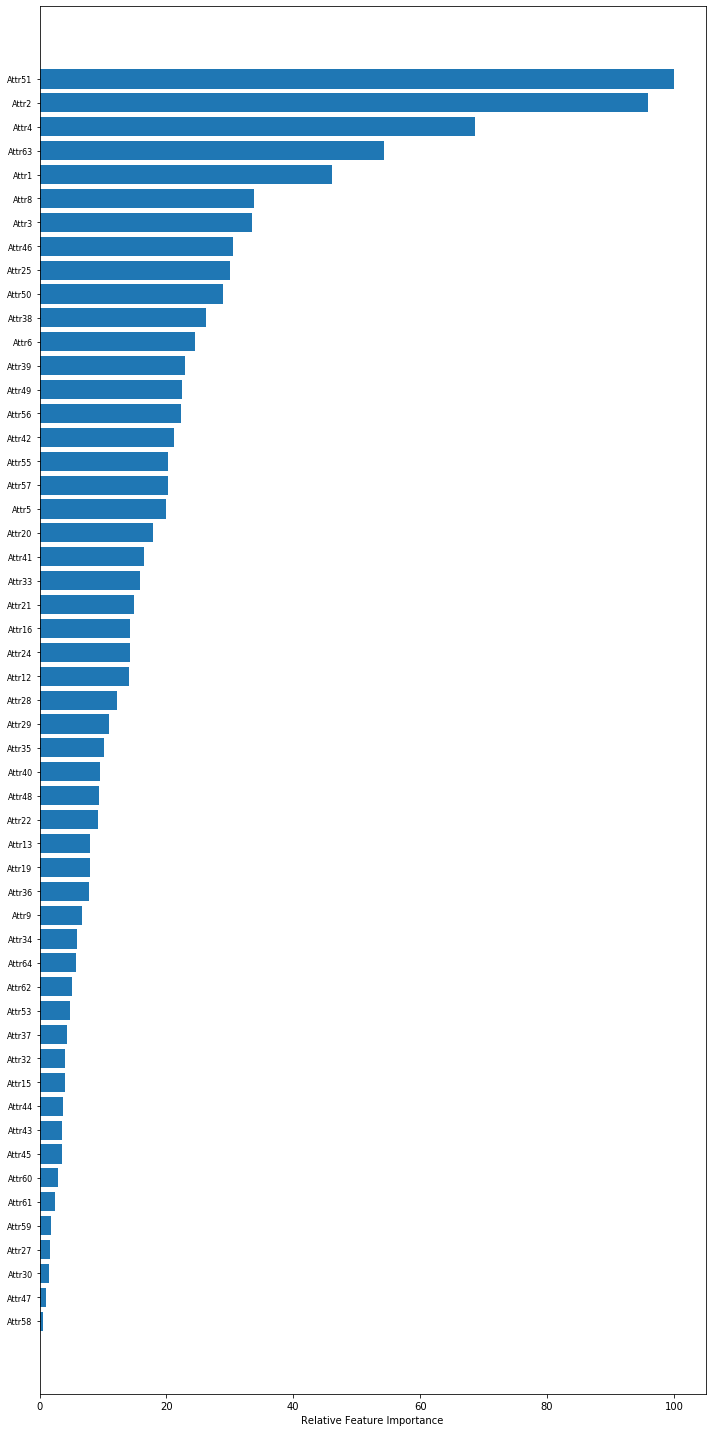

In [51]:
featfig = plt.figure(figsize=(10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [56]:
from sklearn.metrics import cohen_kappa_score

In [57]:
cohen_kappa_score(y_test,y_predicted)

0.0